# Wind & Current Correlation
## GEOF 213
### Haakon L. L. Ervik, Elin D. Chiche, K. Våge

In this notebook, we will analyze wind and current data from the large Filchner-Ronne Ice Shelf (FRIS) in the southern Weddell Sea. The Ice Shelf is located in the Northwestern part of the Antarctic ice shelf. 

Current measurements are obtained from a bottom-anchored mooring at $500\ m$ depth ($77^\circ 00.5'\ S\ 34^\circ 03.0'\ W$). The measurements extend over

In [29]:
from pathlib import Path

import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

#### Import current data to xarray Dataset

In [3]:
df = pd.read_csv(
    'SD-uvw.tab', 
    delimiter='\t',  # Data is separated by tabs.
    skiprows=16,     # Skip 16 rows of commentary
    dtype={'Depth water [m]': float}
)
df['Date/Time'] = pd.to_datetime(df['Date/Time'])  # Convert datetime column to pd.Timestamp
da = df.set_index(['Date/Time', 'Depth water [m]']).to_xarray()  # Create xarray Dataset
da

<xarray.Dataset>
Dimensions:           (Date/Time: 26711, Depth water [m]: 25)
Coordinates:
  * Date/Time         (Date/Time) datetime64[ns] 2013-01-03T12:20:00 ... 2014...
  * Depth water [m]   (Depth water [m]) float64 386.0 390.0 ... 482.0 486.0
Data variables:
    Cur Vel U [cm/s]  (Date/Time, Depth water [m]) float64 nan -5.0 ... -3.4 nan
    Cur vel V [cm/s]  (Date/Time, Depth water [m]) float64 nan -2.7 ... 10.0 nan
    Cur vel W [cm/s]  (Date/Time, Depth water [m]) float64 nan 0.0 ... 0.9 nan

In [33]:
# Select 2013 current data
da13 = da.sel({'Date/Time':'2013'})

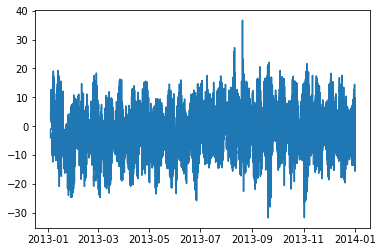

In [52]:
# Plot u current for reference
t = da13['Date/Time'].values
cur_u = da13['Cur Vel U [cm/s]'][:,0].values
plt.plot(t, cur_u)

In [4]:
# Wind data

wind = pd.read_csv(
    'Halley_2007_2014.txt',
    delimiter=' ',  # Data is separated by space
    parse_dates=[[0, 1, 2, 3]],  # Date is YYYY MM DD HH (first 4 cols)
    header=None,
    dtype=str,  # load as str
)
wind.columns = ['date', 'u [knots]', 'v [knots]']

# Bad data is denoted by '0' in u and v columns.
# Set these rows to NaN.
wind[wind[['u [knots]', 'v [knots]']] == '0'] = np.nan

# Convert all data to floats, leaving bad data as NaNs.
wind['u [knots]'] = pd.to_numeric(wind['u [knots]'])
wind['v [knots]'] = pd.to_numeric(wind['v [knots]'])

wind

,date,u [knots],v [knots]
0,2014-06-16 09:00:00,-1.389,7.878
1,2014-06-16 08:00:00,7.794,4.499
2,2014-06-16 07:00:00,5.142,6.128
3,2014-06-16 06:00:00,6.427,7.660
4,2014-06-16 05:00:00,4.500,7.794
...,...,...,...
63974,2007-01-01 04:00:00,-7.878,-1.389
63975,2007-01-01 03:00:00,-9.999,0.000
63976,2007-01-01 02:00:00,-9.848,-1.736
63977,2007-01-01 01:00:00,-11.276,-4.104


<AxesSubplot:xlabel='date'>

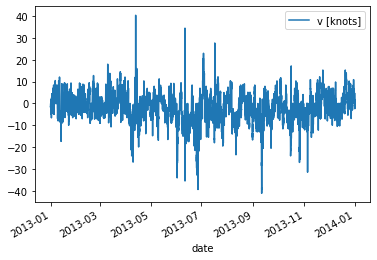

In [53]:
# Plot 2013
wind13 = wind[pd.DatetimeIndex(wind['date']).year == 2013]
wind13.plot('date', 'v [knots]')